In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/faspy/raw_data/main/trips_data.csv')
df.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


In [ ]:
df.info()
cols=[1,2,3,4,7,10,11]
df=df[df.columns[cols]]
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Dropoff Time,Distance (miles),Fare Amount
0,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,2021-01-13 22:29:13 +0000 UTC,4.84,29.63
1,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,2021-01-13 20:54:50 +0000 UTC,5.31,20.86
2,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,2021-01-03 00:50:56 +0000 UTC,5.90,34.23
3,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,2020-12-12 00:32:47 +0000 UTC,19.74,58.77
4,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,2020-12-11 00:57:57 +0000 UTC,2.54,12.63


In [ ]:
#renam
df=df.rename(columns={'Product Type':'type','Trip or Order Status':'status','Request Time':'request_time','Begin Trip Time':'start_time','Dropoff Time':'end_time','Distance (miles)':'distance','Fare Amount':'fare_amt'})
print(df['type'].value_counts(),end='\n')
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}
df['type'].replace(product_mapping,inplace=True)
df=df[df['type']!='UberEATS Marketplace']
print(df['type'].value_counts(),end='\n')
df.head()

UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
Juntos                    1
UberBLACK                 1
uberx                     1
Name: type, dtype: int64
UberX     466
Pool       70
Black       4
Juntos      1
Name: type, dtype: int64


,type,status,request_time,start_time,end_time,distance,fare_amt
0,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,2021-01-13 22:29:13 +0000 UTC,4.84,29.63
1,UberX,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,2021-01-13 20:54:50 +0000 UTC,5.31,20.86
2,UberX,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,2021-01-03 00:50:56 +0000 UTC,5.90,34.23
3,UberX,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,2020-12-12 00:32:47 +0000 UTC,19.74,58.77
4,UberX,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,2020-12-11 00:57:57 +0000 UTC,2.54,12.63


In [ ]:
df.isnull().sum()
df=df.dropna()
df.isnull().sum()

type            0
status          0
request_time    0
start_time      0
end_time        0
distance        0
fare_amt        0
dtype: int64

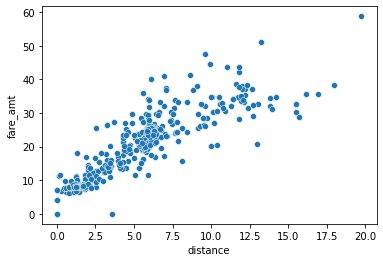

In [ ]:
sns.scatterplot(x='distance',y='fare_amt',data=df)

In [ ]:
from datetime import datetime
from datetime import timedelta

def date_convertion(data, cols):

  for col in cols:
    data[col] = data[col].apply(lambda x: x.replace(' +0000 UTC', ''))
    data[col] = pd.to_datetime(data[col])
    
  return data
 
df = date_convertion(df, ['request_time', 'start_time', 'end_time'])
df.head()
df['year'] = df.request_time.map(lambda x: datetime.strftime(x,"%Y"))
df['month'] = df.request_time.map(lambda x: datetime.strftime(x,"%b"))
df['weekday'] = df.request_time.map(lambda x: datetime.strftime(x,"%a"))
df['time'] = df.request_time.map(lambda x: datetime.strftime(x,"%H:%M"))
df.head()

,type,status,request_time,start_time,end_time,distance,fare_amt,year,month,weekday,time
0,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,2021-01-13 22:29:13,4.84,29.63,2021,Jan,Wed,22:06
1,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,2021-01-13 20:54:50,5.31,20.86,2021,Jan,Wed,20:21
2,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,2021-01-03 00:50:56,5.90,34.23,2021,Jan,Sun,00:23
3,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,2020-12-12 00:32:47,19.74,58.77,2020,Dec,Fri,23:16
4,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,2020-12-11 00:57:57,2.54,12.63,2020,Dec,Fri,00:35


In [ ]:
df['distance_km']=round(df.distance*1.60934,2)
df['amt_km']=round(df.fare_amt/df.distance_km,2)
df['journey_duration']=df.end_time - df.start_time
df.head()

,type,status,request_time,start_time,end_time,distance,fare_amt,year,month,weekday,time,distance_km,amt_km,journey_duration
0,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,2021-01-13 22:29:13,4.84,29.63,2021,Jan,Wed,22:06,7.79,3.80,0 days 00:18:03
1,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,2021-01-13 20:54:50,5.31,20.86,2021,Jan,Wed,20:21,8.55,2.44,0 days 00:27:21
2,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,2021-01-03 00:50:56,5.90,34.23,2021,Jan,Sun,00:23,9.50,3.60,0 days 00:17:56
3,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,2020-12-12 00:32:47,19.74,58.77,2020,Dec,Fri,23:16,31.77,1.85,0 days 01:05:15
4,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,2020-12-11 00:57:57,2.54,12.63,2020,Dec,Fri,00:35,4.09,3.09,0 days 00:11:11


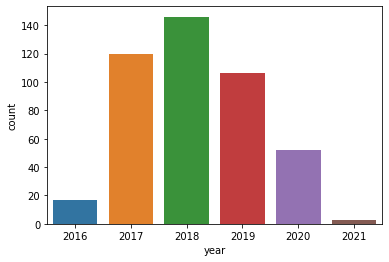

In [ ]:
completed_rides = df[(df.status!='CANCELED')&(df.status!='DRIVER_CANCELED')] 
sns.countplot(x='year',order=['2016','2017','2018','2019','2020','2021'],data=completed_rides)

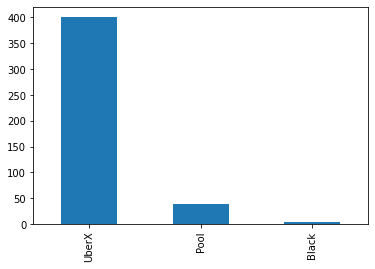

In [ ]:
completed_rides['type'].value_counts().plot(kind='bar')

In [ ]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [ ]:
x=df.iloc[:,5:6].values
y=df.iloc[:,6].values


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()
X_train,X_test,Y_train,y_test=train_test_split(x,y,test_size=0.3)
model.fit(X_train,Y_train)
y_predict=model.predict(X_test)
print(model.intercept_,model.coef_)
print(y_predict)
print(model.score(X_test,y_test))

6.640763063179328 [2.50508911]
[21.54604328 37.62871538 10.99961812 25.75459299 36.17576369  9.62181911
 21.64624684  9.69697178 45.92056034  9.62181911 21.87170486 12.15195911
 18.56498724 22.14726467 23.52506368 25.87984744 20.6442112  37.5535627
 39.18187063 21.17027991  9.72202267  9.64687     9.74707356  9.52161554
 20.61916031  8.71998703 29.98819359 15.30837139 35.77494943 21.57109417
 16.61101773 17.86356228 22.19736645 20.69431298 38.43034389 10.7741601
 18.41468189 19.26641219  9.39636109 10.94951634 28.2596821  21.4959415
 21.4959415  23.97597972 22.59818071 22.14726467 14.78230268 11.09982168
 22.39777358 18.13912209  9.67192089 11.42548327  9.97253158 36.20081458
 32.14257022 36.05050924 41.26109459  9.67192089 19.54197199 19.96783714
  9.84727713  8.56968168 21.69634863 20.76946565  9.74707356 27.75866428
 31.99226488 17.31244268 49.00181995 24.05113239 36.25091637 13.47965634
  9.0706995  18.48983456 10.92446544  9.9224298  22.87374051 32.59348626
 24.17638685 29.5873793

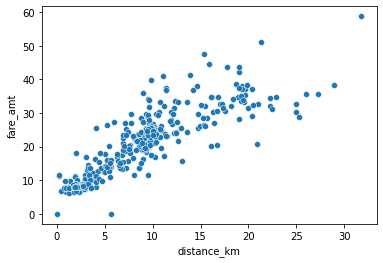

In [ ]:
sns.scatterplot(x='distance_km',y='fare_amt',data=df)

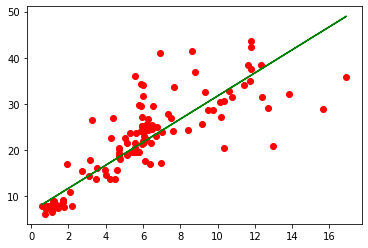

In [ ]:
plt.scatter(X_test,y_test,color="red")
plt.plot(X_test,y_predict,color='green')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
print('mean absolute error {}'.format(mae))
print('mean square error {}'.format(mse))
print('root mean square error {}'.format(rmse))

mean absolute error 3.4678767995696296
mean square error 26.616212710005566
root mean square error 5.159090298686927
